In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats

# Fetch financial data using YFinance
assets = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

data = yf.download(assets, start=start_date, end=end_date)

# Show the first few rows of the data
print(data.head())

Matplotlib is building the font cache; this may take a moment.
[*********************100%***********************]  3 of 3 completed

Price                      Adj Close                             Close  \
Ticker                           BND         SPY       TSLA        BND   
Date                                                                     
2015-01-02 00:00:00+00:00  63.172344  173.173767  14.620667  82.650002   
2015-01-05 00:00:00+00:00  63.355785  170.046295  14.006000  82.889999   
2015-01-06 00:00:00+00:00  63.539200  168.444687  14.085333  83.129997   
2015-01-07 00:00:00+00:00  63.577454  170.543655  14.063333  83.180000   
2015-01-08 00:00:00+00:00  63.478092  173.569931  14.041333  83.050003   

Price                                                  High              \
Ticker                            SPY       TSLA        BND         SPY   
Date                                                                      
2015-01-02 00:00:00+00:00  205.429993  14.620667  82.690002  206.880005   
2015-01-05 00:00:00+00:00  201.720001  14.006000  82.919998  204.369995   
2015-01-06 00:00:00+00:00  199.8

In [3]:
# Step 2: Data Cleaning and Understanding
# Check for missing values
print("Missing values in data:")
print(data.isnull().sum())

# Fill missing values using forward fill and backward fill where necessary
data_clean = data.fillna(method='ffill').fillna(method='bfill')

# Check the data types to ensure they are appropriate
print("\nData types after cleaning:")
print(data_clean.dtypes)

# Summary statistics
print("\nSummary statistics:")
print(data_clean.describe())

Missing values in data:
Price      Ticker
Adj Close  BND       0
           SPY       0
           TSLA      0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA      0
dtype: int64

Data types after cleaning:
Price      Ticker
Adj Close  BND       float64
           SPY       float64
           TSLA      float64
Close      BND       float64
           SPY       float64
           TSLA      float64
High       BND       float64
           SPY       float64
           TSLA      float64
Low        BND       float64
           SPY       float64
           TSLA      float64
Open       BND       float64
           SPY       float64
           TSLA      float64
Volume     BND         int64
           SPY       

/tmp/ipykernel_17943/177837488.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_clean = data.fillna(method='ffill').fillna(method='bfill')


Price     Adj Close                                  Close               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean      69.884952   310.253154   111.438965    80.316039   330.623634   
std        4.876945   111.250656   110.120450     5.097592   103.324179   
min       62.453285   157.328552     9.578000    68.040001   182.860001   
25%       66.118982   214.822334    17.066167    76.379997   242.130001   
50%       68.686237   275.812363    25.043000    81.410004   298.089996   
75%       73.604731   402.297516   216.865002    84.010002   416.212502   
max       79.578110   584.590027   409.970001    89.480003   584.590027   

Price                       High                                    Low  \
Ticker         TSLA          BND          SPY         TSLA          BND   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean     111.438965    8

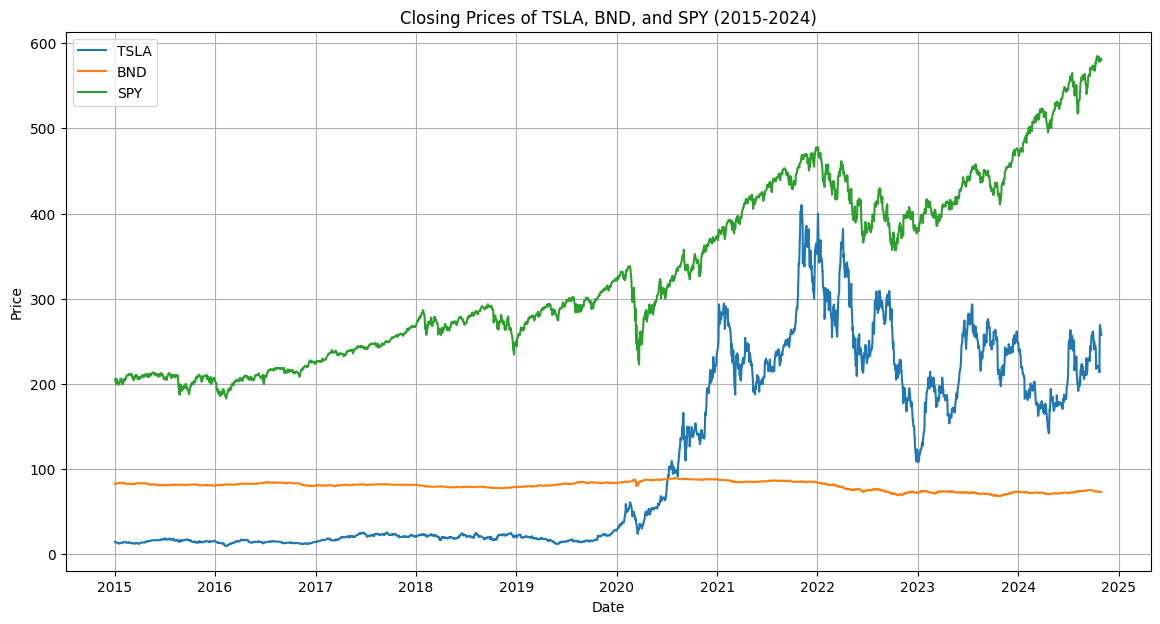

In [4]:
# 3.1 Visualize the closing price over time for each asset
plt.figure(figsize=(14, 7))
for asset in assets:
    plt.plot(data_clean['Close'][asset], label=asset)
plt.title('Closing Prices of TSLA, BND, and SPY (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

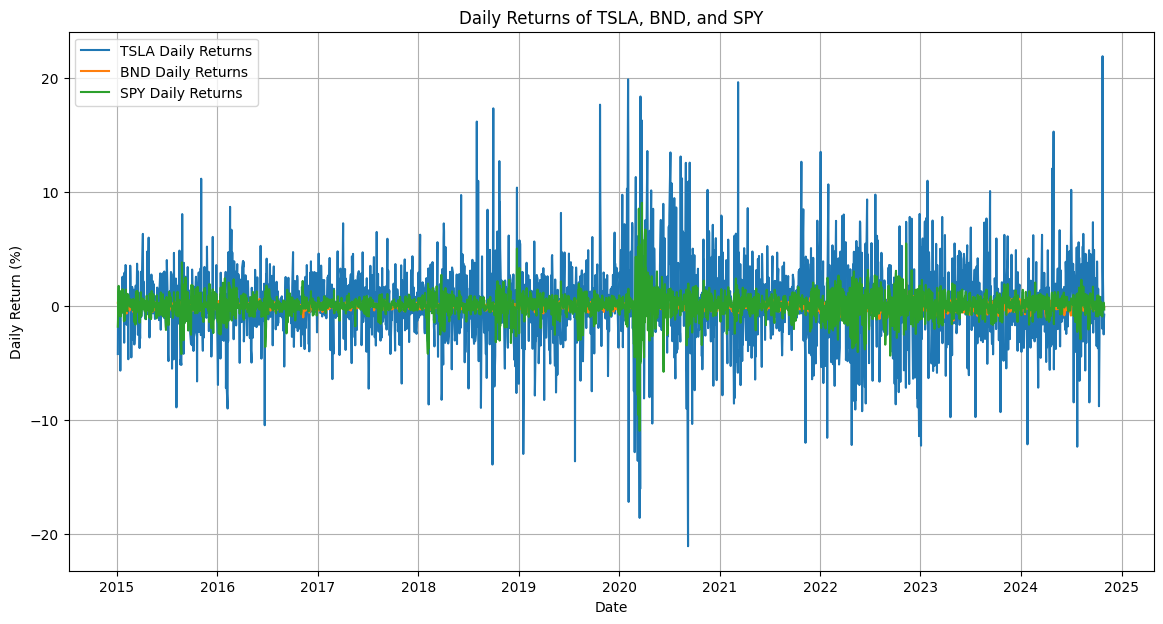

In [5]:
# 3.2 Calculate daily returns (percentage change)
daily_returns = data_clean['Close'].pct_change() * 100

# 3.3 Plot daily returns for each asset
plt.figure(figsize=(14, 7))
for asset in assets:
    plt.plot(daily_returns[asset], label=f'{asset} Daily Returns')
plt.title('Daily Returns of TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()

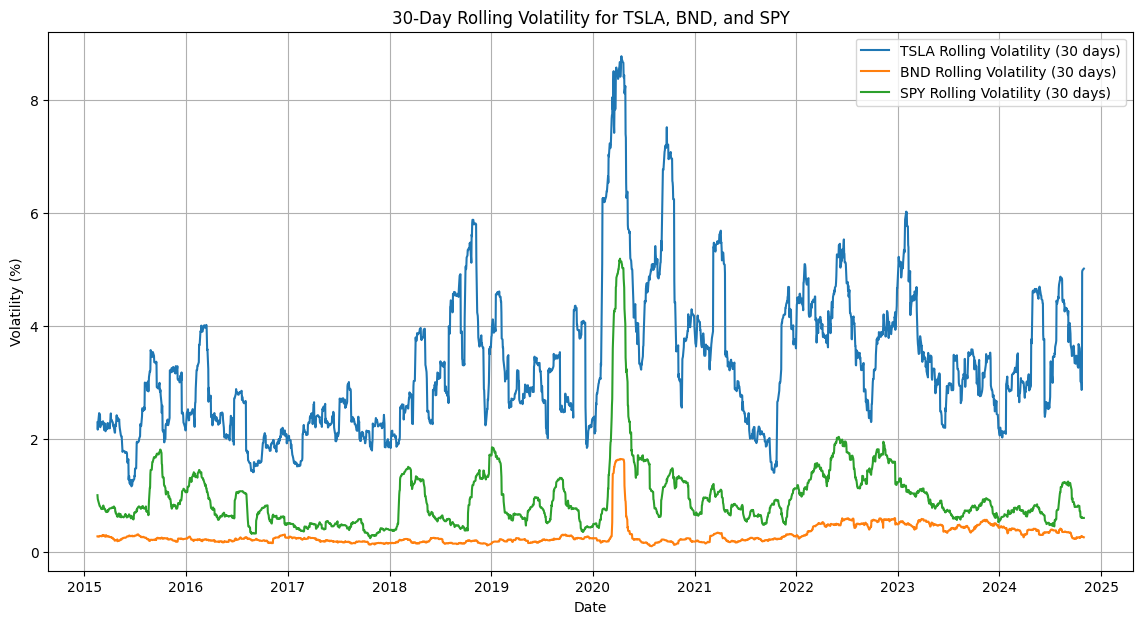

In [6]:
# 3.4 Analyze volatility (rolling window of 30 days for volatility)
rolling_volatility = daily_returns.rolling(window=30).std()

# Plot rolling volatility for each asset
plt.figure(figsize=(14, 7))
for asset in assets:
    plt.plot(rolling_volatility[asset], label=f'{asset} Rolling Volatility (30 days)')
plt.title('30-Day Rolling Volatility for TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# 3.5 Outlier detection (Identify significant anomalies)
# Z-score method for outlier detection (Z-score > 3 indicates outliers)
from scipy import stats

z_scores = np.abs(stats.zscore(daily_returns.dropna(), axis=0))

outliers = pd.DataFrame(z_scores > 3, index=daily_returns.index, columns=daily_returns.columns)

outliers = outliers.fillna(False)

for asset in assets:
    print(f'Outliers for {asset}:')

    outlier_dates = daily_returns[asset][outliers[asset]]

    print(outlier_dates.index)

Outliers for TSLA:
DatetimeIndex(['2015-11-04 00:00:00+00:00', '2018-08-02 00:00:00+00:00',
               '2018-08-07 00:00:00+00:00', '2018-09-28 00:00:00+00:00',
               '2018-10-01 00:00:00+00:00', '2018-10-23 00:00:00+00:00',
               '2019-01-18 00:00:00+00:00', '2019-07-25 00:00:00+00:00',
               '2019-10-24 00:00:00+00:00', '2020-02-03 00:00:00+00:00',
               '2020-02-04 00:00:00+00:00', '2020-02-05 00:00:00+00:00',
               '2020-02-27 00:00:00+00:00', '2020-03-02 00:00:00+00:00',
               '2020-03-09 00:00:00+00:00', '2020-03-12 00:00:00+00:00',
               '2020-03-16 00:00:00+00:00', '2020-03-18 00:00:00+00:00',
               '2020-03-19 00:00:00+00:00', '2020-03-24 00:00:00+00:00',
               '2020-04-13 00:00:00+00:00', '2020-07-06 00:00:00+00:00',
               '2020-08-12 00:00:00+00:00', '2020-08-17 00:00:00+00:00',
               '2020-08-31 00:00:00+00:00', '2020-09-08 00:00:00+00:00',
               '2020-09-09 00:00

/tmp/ipykernel_17943/1420744894.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  outliers = outliers.fillna(False)


<Figure size 1400x1000 with 0 Axes>

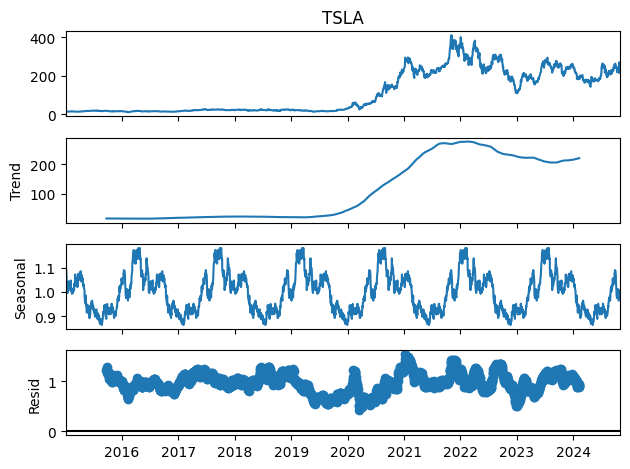

In [8]:
# Step 4: Decompose the time series into trend, seasonality, and residuals
tsla_data = data_clean['Close']['TSLA']
decomposition = seasonal_decompose(tsla_data, model='multiplicative', period=365)

# Plot the decomposition results
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.show()

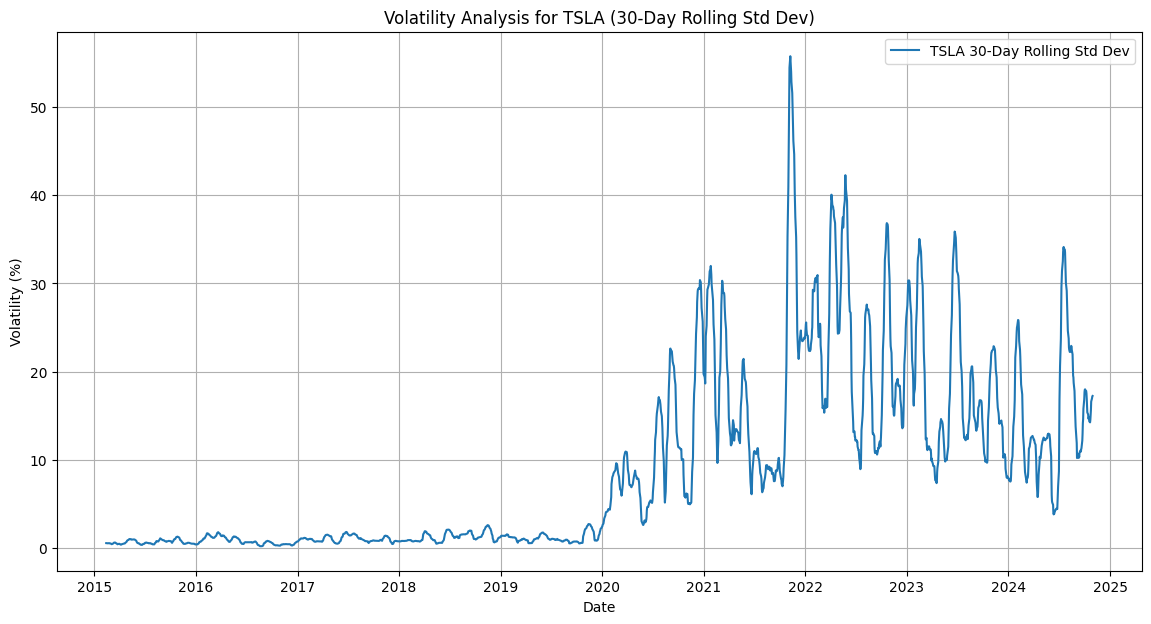

In [9]:
# Step 5: Volatility analysis
# Rolling standard deviation (30-day window)
rolling_std = data_clean['Close'].rolling(window=30).std()

# Plot rolling standard deviation (volatility)
plt.figure(figsize=(14, 7))
plt.plot(rolling_std['TSLA'], label='TSLA 30-Day Rolling Std Dev')
plt.title('Volatility Analysis for TSLA (30-Day Rolling Std Dev)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Step 6: Calculate Value at Risk (VaR) and Sharpe Ratio
# 6.1 Calculate Value at Risk (VaR) at 95% confidence interval for TSLA
VaR_95 = daily_returns['TSLA'].quantile(0.05)  # 5% quantile represents VaR at 95% confidence
print(f"Value at Risk (VaR) for TSLA at 95% confidence: {VaR_95 * 100}%")

Value at Risk (VaR) for TSLA at 95% confidence: -512.5703646165556%


In [11]:
# 6.2 Calculate Sharpe Ratio for TSLA (assuming a risk-free rate of 0%)
mean_return = daily_returns['TSLA'].mean()
print(mean_return)


0.17990506576536694
